In [3]:
# 필요한 모듈들
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline   
import xlrd
import wbgapi as wb
from gedaTools import timeToInt

In [2]:
# 청소년 총 출산율
adoDT = wb.data.DataFrame('SP.ADO.TFRT', skipBlanks=True)

In [3]:
# 남아에 대한 여아의 취학율
priDT = wb.data.DataFrame('SE.ENR.PRSC.FM.ZS', skipBlanks=True)

In [4]:
priDT.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, ABW to ZWE
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YR1970  72 non-null     float64
 1   YR1971  155 non-null    float64
 2   YR1972  150 non-null    float64
 3   YR1973  148 non-null    float64
 4   YR1974  142 non-null    float64
 5   YR1975  141 non-null    float64
 6   YR1976  148 non-null    float64
 7   YR1977  150 non-null    float64
 8   YR1978  144 non-null    float64
 9   YR1979  142 non-null    float64
 10  YR1980  139 non-null    float64
 11  YR1981  150 non-null    float64
 12  YR1982  144 non-null    float64
 13  YR1983  146 non-null    float64
 14  YR1984  151 non-null    float64
 15  YR1985  147 non-null    float64
 16  YR1986  155 non-null    float64
 17  YR1987  147 non-null    float64
 18  YR1988  147 non-null    float64
 19  YR1989  146 non-null    float64
 20  YR1990  145 non-null    float64
 21  YR1991  146 non-null    float64
 22  YR199

In [5]:
pradDT = wb.data.DataFrame(['SE.ENR.PRSC.FM.ZS', 'SP.ADO.TFRT'], skipBlanks=True, columns='series')

In [20]:
pradRST = pradDT.reset_index()

In [21]:
pradRST

,economy,time,SE.ENR.PRSC.FM.ZS,SP.ADO.TFRT
0,ABW,YR1960,NaN,106.2062
1,ABW,YR1961,NaN,102.8116
2,ABW,YR1962,NaN,99.4170
3,ABW,YR1963,NaN,94.4542
4,ABW,YR1964,NaN,89.4914
...,...,...,...,...
14793,ZWE,YR2015,NaN,95.2182
14794,ZWE,YR2016,NaN,90.6766
14795,ZWE,YR2017,NaN,86.1350
14796,ZWE,YR2018,NaN,83.2486


In [24]:
pradYR = pradRST.copy()
pradYR['time'] = timeToInt(pradRST)

In [26]:
pradYR.dropna(inplace=True)

In [27]:
pradYR

,economy,time,SE.ENR.PRSC.FM.ZS,SP.ADO.TFRT
39,ABW,1999,1.01192,44.8300
40,ABW,2000,0.99266,43.5930
41,ABW,2001,0.99949,42.3560
42,ABW,2002,0.98900,41.1190
43,ABW,2003,0.97706,39.6676
...,...,...,...,...
14779,ZWE,2001,0.94385,100.2964
14780,ZWE,2002,0.94233,100.3510
14781,ZWE,2003,0.94786,102.4990
14790,ZWE,2012,0.96703,108.8430


In [31]:
# 나라별 취학율 범주화
pradGR = pradYR.groupby('economy')[['SE.ENR.PRSC.FM.ZS', 'SP.ADO.TFRT']].agg(\
    **{'adoAV':pd.NamedAgg(column='SP.ADO.TFRT', aggfunc='mean'),\
       'priAV':pd.NamedAgg(column='SE.ENR.PRSC.FM.ZS', aggfunc='mean')})\
.reset_index()

pradBIN = pradGR.copy()
pradBIN["priCL"] = pd.qcut(pradGR["priAV"], 10, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8 , 9])
pradBIN

,economy,adoAV,priAV,priCL
0,ABW,36.355857,0.992578,6
1,AFG,133.825889,0.437368,0
2,AGO,199.294267,0.754897,1
3,ALB,19.098735,0.972912,4
4,ARB,72.617484,0.812816,2
...,...,...,...,...
229,WSM,39.915243,1.059474,9
230,YEM,77.166655,0.683014,0
231,ZAF,72.847544,1.012826,8
232,ZMB,179.532289,0.839429,2


[]

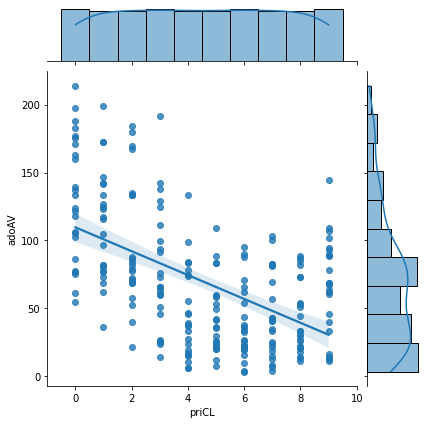

In [32]:
sns.jointplot(x="priCL", y="adoAV", data=pradBIN, kind="reg")
plt.plot()

In [ ]:
# 취학율이 높아질수록
# 청소년 출산율이 낮아지는 양상을 보인다.